<h1>Exploring new spots for Pilates Studio in São Paulo - Brazil

<img src = "https://i3.wp.com/www.mundorh.com.br/wp-content/uploads/2020/02/pilates-mat%C3%A9ria-senivpetro.jpg" width = 500>


<h3>
   This jupyter notebook explore possibilities to open a new Pilates Studio in São Paulo, Brazil as a part of IBM Data Science Capstone Project.
<h3>    
The objective is to cluster the venues based on social-economic and geo-spatial data characteristics of their neighborhoods location.This will bring insights about the best location to open a new Pilates Studio.

Author: Renato Souza

https://www.linkedin.com/in/renato-de-oliveira-souza-msc-06153322/?locale=en_US

<h2>Introduction

The prerequisites for defining the best location are:
- Higher population density of people over 40 years of age;
- Greater awareness of the importance of seeking qualified professionals to provide the correct treatment and follow-up;
- Higher family income.

To meet these requirements, the following indicators will be used:
- Population density over 40 years old = Number of people over 40 years old / neighborhood area.
- HDI - Human development index, which characterizes a higher cultural level and awareness of the importance of a qualified professional;
- Monthly family income.

Based on these 3 indicators, an average index of the 3 will be created to capture the average weight of each one.

<h3>Data acquisition, cleaning and preprocessing

In [72]:
#installing libraries
import pandas as pd
import numpy as np
import requests

In [2]:
#The below url contains html tables with data about neighborhoods area(km²) and population.
url = "https://www.prefeitura.sp.gov.br/cidade/secretarias/subprefeituras/subprefeituras/dados_demograficos/index.php?p=12758"
# get the contents of the webpage in text format and store in a dataframe
html_data  = requests.get(url)
distrito_data = pd.read_html(html_data.content, header=0, thousands='.', decimal=',')[0]
distrito_data

,Subprefeituras,Distritos,Área (km²),População (2010),Densidade Demográfica (Hab/km²)
0,Aricanduva,Aricanduva,6.6,89622.0,13579.000
1,Aricanduva,Carrão,7.5,83281.0,11104.000
2,Aricanduva,Vila Formosa,7.4,94799.0,12811.000
3,Aricanduva,TOTAL,21.5,267702.0,12451.000
4,Butantã,Butantã,12.5,54196.0,4336.000
...,...,...,...,...,...
121,Vila Mariana,TOTAL,26.5,344632.0,13.005
122,Vila Prudente,São Lucas,9.9,142347.0,14.378
123,Vila Prudente,Vila Prudente,9.9,104242.0,10.529
124,Vila Prudente,TOTAL,1980.0,246589.0,12454.000


In [3]:
#Drop columns that aren't necessary
distrito_data = distrito_data.drop(columns=['Subprefeituras', "População (2010)", "Densidade Demográfica (Hab/km²)"])
#Print the new dataframe
distrito_data

,Distritos,Área (km²)
0,Aricanduva,6.6
1,Carrão,7.5
2,Vila Formosa,7.4
3,TOTAL,21.5
4,Butantã,12.5
...,...,...
121,TOTAL,26.5
122,São Lucas,9.9
123,Vila Prudente,9.9
124,TOTAL,1980.0


In [4]:
#Rename column 2
distrito_data = distrito_data.rename(columns={"Área (km²)": 'KmSqr'})

In [5]:
#Remove cells with Totals
distrito_data = distrito_data[distrito_data.Distritos != 'TOTAL']

In [6]:
#Remove cells with missing values
district_data = distrito_data.dropna()
#Print the new dataframe
district_data

,Distritos,KmSqr
0,Aricanduva,6.6
1,Carrão,7.5
2,Vila Formosa,7.4
4,Butantã,12.5
5,Morumbi,11.4
...,...,...
118,Moema,9.0
119,Saúde,8.9
120,Vila Mariana,8.6
122,São Lucas,9.9


<h4>Because of some decimal separator problems of website source, we needed to chance some cells value.

In [7]:
#Correcting some data error import
district_data = np.asarray(district_data)
np.place(district_data, district_data==610.0, [6.1])

In [8]:
#Correcting some data error import
district_data = np.asarray(district_data)
np.place(district_data, district_data==1290.0, [12.9])

In [9]:
#Returning to pandas dataframe
district_data = pd.DataFrame(district_data, columns = ['Distritos','KmSqr'])

district_data.head()

,Distritos,KmSqr
0,Aricanduva,6.6
1,Carrão,7.5
2,Vila Formosa,7.4
3,Butantã,12.5
4,Morumbi,11.4


<h4>Importing csv file with population over 40 years old by neighborhood.

In [10]:
#Import csv file
age_df = pd.read_csv(r"C:\Users\ros03\OneDrive - Insper - Institudo de Ensino e Pesquisa\IBM\pop40_69.csv", sep = ';', encoding = 'utf-8')
age_df

,Distritos,Populacao
0,Água Rasa,33644
1,Alto de Pinheiros,17822
2,Anhanguera,28129
3,Aricanduva,32288
4,Artur Alvim,37535
...,...,...
91,Vila Mariana,57092
92,Vila Matilde,40628
93,Vila Medeiros,44205
94,Vila Prudente,41236


In [11]:
#Merge dataframes of area and population
density_pd = pd.merge(district_data, age_df, left_on='Distritos', right_on='Distritos')
density_pd

,Distritos,KmSqr,Populacao
0,Aricanduva,6.6,32288
1,Carrão,7.5,34431
2,Vila Formosa,7.4,36903
3,Butantã,12.5,21827
4,Morumbi,11.4,20644
...,...,...,...
91,Moema,9,40810
92,Saúde,8.9,58598
93,Vila Mariana,8.6,57092
94,São Lucas,9.9,55156


In [12]:
#Create population density variable
density_pd['Density'] = density_pd.Populacao / density_pd.KmSqr
density_pd

,Distritos,KmSqr,Populacao,Density
0,Aricanduva,6.6,32288,4892.12
1,Carrão,7.5,34431,4590.8
2,Vila Formosa,7.4,36903,4986.89
3,Butantã,12.5,21827,1746.16
4,Morumbi,11.4,20644,1810.88
...,...,...,...,...
91,Moema,9,40810,4534.44
92,Saúde,8.9,58598,6584.04
93,Vila Mariana,8.6,57092,6638.6
94,São Lucas,9.9,55156,5571.31


In [13]:
#Density normalized min max to fit scale 0 and 1.
density_pd["Density"] = ((density_pd["Density"]-density_pd["Density"].min()) / (density_pd["Density"].max()-density_pd["Density"].min()))
density_pd

,Distritos,KmSqr,Populacao,Density
0,Aricanduva,6.6,32288,0.42101
1,Carrão,7.5,34431,0.395006
2,Vila Formosa,7.4,36903,0.429189
3,Butantã,12.5,21827,0.149513
4,Morumbi,11.4,20644,0.155098
...,...,...,...,...
91,Moema,9,40810,0.390142
92,Saúde,8.9,58598,0.567023
93,Vila Mariana,8.6,57092,0.571732
94,São Lucas,9.9,55156,0.479624


<h4>Get the contents of the webpage with HDI of each neighborhood and store in a dataframe

In [14]:
tables = pd.read_html("https://pt.wikipedia.org/wiki/Lista_dos_distritos_de_S%C3%A3o_Paulo_por_%C3%8Dndice_de_Desenvolvimento_Humano")

In [15]:
#First table
table1=tables[1]
table1 = table1.rename(columns={"Dados de 2000": 'HDI'})
table1.columns=table1.columns.get_level_values(1)
table1= table1.drop(columns="Unnamed: 3_level_1")
table1 = table1.drop(columns='Posição')
table1.rename(columns = {'Distrito': 'Distritos'}, inplace = True)
table1.head(5)

,Distritos,HDI
0,Moema,961
1,Pinheiros,960
2,Perdizes,957
3,Jardim Paulista,957
4,Alto de Pinheiros,955


In [16]:
#Second table
table2=tables[2]
table2 = table2.rename(columns={"Dados de 2000": 'HDI'})
table2.columns=table2.columns.get_level_values(1)
table2= table2.drop(columns="Unnamed: 3_level_1")
table2 = table2.drop(columns='Posição')
table2.rename(columns = {'Distrito': 'Distritos'}, inplace = True)
table2.head(5)

,Distritos,HDI
0,Vila Guilherme,868
1,Brás,868
2,Vila Prudente,867
3,Penha,865
4,Vila Matilde,864


In [17]:
#Third table
table3=tables[4]
table3 = table3.rename(columns={"Dados de 2012": 'HDI'})
table3.columns=table3.columns.get_level_values(1)
table3= table3.drop(columns="Unnamed: 3_level_1")
table3 = table3.drop(columns='Posição')
table3.rename(columns = {'Distrito': 'Distritos'}, inplace = True)
table3.head(5)

,Distritos,HDI
0,Parque do Carmo,799
1,Jardim São Luís,796
2,Itaquera,795
3,Jaraguá,791
4,Sapopemba,786


In [18]:
#Forth table
table4=tables[5]
table4 = table4.rename(columns={"Dados de 2012": 'HDI'})
table4.columns=table4.columns.get_level_values(1)
table4= table4.drop(columns="Unnamed: 3_level_1")
table4 = table4.drop(columns='Posição')
table4.rename(columns = {'Distrito': 'Distritos'}, inplace = True)
table4.head(5)

,Distritos,HDI
0,São Rafael,767
1,Cidade Tiradentes,766
2,Vila Curuçá,765
3,Itaim Paulista,762
4,Grajaú,754


In [19]:
#Create apppend table with the last 4 tables
hdi_df = table1.append([table2, table3, table4])
#Correcting the decimal separator import problem
hdi_df['HDI'] = hdi_df['HDI']/1000
hdi_df

,Distritos,HDI
0,Moema,0.961
1,Pinheiros,0.960
2,Perdizes,0.957
3,Jardim Paulista,0.957
4,Alto de Pinheiros,0.955
...,...,...
6,Iguatemi,0.751
7,Jardim Ângela,0.750
8,Lajeado,0.748
9,Parelheiros,0.747


In [20]:
#Correcting some neighborhood names
hdi_df['Distritos'] = hdi_df['Distritos'].str.replace('Anhangüera','Anhanguera')

In [21]:
#Correcting some neighborhood names
hdi_df['Distritos'] = hdi_df['Distritos'].str.replace('São Miguel Paulista','São Miguel')

In [22]:
#Merge dataframes of density population and HDI
hdi_density = pd.merge(density_pd, hdi_df, left_on='Distritos', right_on='Distritos')
#Create the HDDI column with the mean between Density and HDI by neighborhood
hdi_density['HDDI'] = (hdi_density['Density'] + hdi_density['HDI'])/2
hdi_density

,Distritos,KmSqr,Populacao,Density,HDI,HDDI
0,Aricanduva,6.6,32288,0.42101,0.830,0.625505
1,Carrão,7.5,34431,0.395006,0.886,0.640503
2,Vila Formosa,7.4,36903,0.429189,0.884,0.656594
3,Butantã,12.5,21827,0.149513,0.928,0.538757
4,Morumbi,11.4,20644,0.155098,0.938,0.546549
...,...,...,...,...,...,...
91,Moema,9,40810,0.390142,0.961,0.675571
92,Saúde,8.9,58598,0.567023,0.942,0.754512
93,Vila Mariana,8.6,57092,0.571732,0.950,0.760866
94,São Lucas,9.9,55156,0.479624,0.864,0.671812


In [23]:
#Row sorting by HDDI
hdi_density = hdi_density.sort_values (by='HDDI',ascending=False)
hdi_density

,Distritos,KmSqr,Populacao,Density,HDI,HDDI
80,Bela Vista,2.6,30163,1,0.940,0.97
85,República,2.3,25931,0.971797,0.901,0.936398
86,Santa Cecília,3.9,36681,0.810505,0.930,0.870252
42,Perdizes,6.1,49726,0.702321,0.957,0.82966
84,Liberdade,3.7,29803,0.693955,0.936,0.814977
...,...,...,...,...,...,...
59,Perus,23.9,28812,0.102856,0.772,0.437428
12,Grajaú,92,124457,0.115566,0.754,0.434783
58,Anhanguera,33.3,28129,0.0717184,0.774,0.422859
53,Parelheiros,153.5,47670,0.0256202,0.747,0.38631


<h3>Importing csv file with monthly family income by neighborhood

In [24]:
#Import csv file
famincome = pd.read_csv(r"C:\Users\ros03\OneDrive - Insper - Institudo de Ensino e Pesquisa\IBM\Rendafamiliar.csv")
famincome

,Distritos,Renda
0,Alto de Pinheiros,9591.93
1,Perdizes,9348.58
2,Jardim Paulista,9327.12
3,Moema,9248.43
4,Santo Amaro,9159.73
...,...,...
91,São Rafael,2771.43
92,Cidade Tiradentes,2761.13
93,Parelheiros,2644.09
94,Perus,2642.91


In [25]:
#Family income normalized min max to fit scale 0 and 1.
famincome["Renda"] = ((famincome["Renda"]-famincome["Renda"].min()) / (famincome["Renda"].max()-famincome["Renda"].min()))
famincome

,Distritos,Renda
0,Alto de Pinheiros,1.000000
1,Perdizes,0.965052
2,Jardim Paulista,0.961971
3,Moema,0.950670
4,Santo Amaro,0.937932
...,...,...
91,São Rafael,0.020508
92,Cidade Tiradentes,0.019028
93,Parelheiros,0.002220
94,Perus,0.002051


In [26]:
#Merge dataframes of Density HDDI and Family income
hdi_density2 = pd.merge(hdi_density, famincome, left_on='Distritos', right_on='Distritos')
hdi_density2

,Distritos,KmSqr,Populacao,Density,HDI,HDDI,Renda
0,Bela Vista,2.6,30163,1,0.940,0.97,0.490976
1,República,2.3,25931,0.971797,0.901,0.936398,0.285507
2,Santa Cecília,3.9,36681,0.810505,0.930,0.870252,0.377792
3,Perdizes,6.1,49726,0.702321,0.957,0.82966,0.965052
4,Liberdade,3.7,29803,0.693955,0.936,0.814977,0.462976
...,...,...,...,...,...,...,...
91,Perus,23.9,28812,0.102856,0.772,0.437428,0.002051
92,Grajaú,92,124457,0.115566,0.754,0.434783,0.043036
93,Anhanguera,33.3,28129,0.0717184,0.774,0.422859,0.042859
94,Parelheiros,153.5,47670,0.0256202,0.747,0.38631,0.002220


<h3>Create the HDDII main Index column with the mean between HDDI and Family
income by neighborhood

In [27]:
#Create the column HDDII
hdi_density2['HDDII'] = (hdi_density2['HDDI'] + hdi_density2['Renda'])/2
#Column sort bay HDDII
hdi_density2 = hdi_density2.sort_values (by='HDDII',ascending=False)
#Translate column names to english
hdi_density2 = hdi_density2.rename(columns={'Distritos': 'Neighborhood', 'Populacao':'Population', 'Renda': 'FamIncome'})
hdi_density2.head(10)

,Neighborhood,KmSqr,Population,Density,HDI,HDDI,FamIncome,HDDII
3,Perdizes,6.1,49726,0.702321,0.957,0.82966,0.965052,0.897356
7,Jardim Paulista,6.1,39724,0.560817,0.957,0.758908,0.961971,0.86044
15,Moema,9,40810,0.390142,0.961,0.675571,0.950670,0.813121
60,Alto de Pinheiros,7.7,17822,0.198565,0.955,0.576782,1.000000,0.788391
9,Consolação,3.7,23489,0.546685,0.950,0.748343,0.776432,0.762387
5,Vila Mariana,8.6,57092,0.571732,0.950,0.760866,0.757721,0.759293
72,Santo Amaro,15.6,31751,0.174468,0.943,0.558734,0.937932,0.748333
0,Bela Vista,2.6,30163,1,0.940,0.97,0.490976,0.730488
31,Pinheiros,8,29115,0.312898,0.960,0.636449,0.815931,0.72619
20,Itaim Bibi,9.9,43209,0.37548,0.953,0.66424,0.780038,0.722139


<h2>Get the latitude and the longitude coordinates of each neighborhood and merging dataframes. 

In [28]:
#Installing libraries
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import folium
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans


In [29]:
#Use geopy library to get the latitude and longitude values of São Paulo.
address = 'Sao Paulo / BR'

geolocator = Nominatim(user_agent="sp_explorer")
location = geolocator.geocode(address)
sp_coord = (location.latitude, location.longitude)

sp_coord

(-23.5506507, -46.6333824)

In [30]:
# Defining the function to get the Latitude and Longitude of given neighborhood
def get_lat_long(neigh):
    address = neigh + ', Sao Paulo / BR'

    geolocator = Nominatim(user_agent="sp_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    return (latitude, longitude)

In [31]:
# Instantiating the dataframe
coords = pd.DataFrame(columns=['Neighborhood', 'coords'])
coords['Neighborhood'] = hdi_density2['Neighborhood']
coords['coords'] = coords['Neighborhood'].apply(get_lat_long)

In [32]:
#Adding the Coordinates to the Neighborhood DataFrame casted as floats
hdi_density2['Latitude'] = coords['coords'].apply(lambda x : x[0]).astype('float')
hdi_density2['Longitude'] = coords['coords'].apply(lambda x : x[1]).astype('float')
hdi_density2 = hdi_density2.sort_values (by='HDDII',ascending=False)
hdi_density2.head()

,Neighborhood,KmSqr,Population,Density,HDI,HDDI,FamIncome,HDDII,Latitude,Longitude
3,Perdizes,6.1,49726,0.702321,0.957,0.82966,0.965052,0.897356,-23.537929,-46.680671
7,Jardim Paulista,6.1,39724,0.560817,0.957,0.758908,0.961971,0.86044,-23.567435,-46.663692
15,Moema,9,40810,0.390142,0.961,0.675571,0.950670,0.813121,-23.597085,-46.662888
60,Alto de Pinheiros,7.7,17822,0.198565,0.955,0.576782,1.000000,0.788391,-23.549461,-46.712293
9,Consolação,3.7,23489,0.546685,0.950,0.748343,0.776432,0.762387,-23.557818,-46.660537


<h3>Create maps to visualize the neighborhoods position

In [33]:
# create map of Sao Paulo using latitude and longitude values
map_sp = folium.Map(location=[sp_coord[0], sp_coord[1]],zoom_start=10)

# add markers to map
for lat, lng, name in zip(hdi_density2['Latitude'], hdi_density2['Longitude'], hdi_density2['Neighborhood']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)  
    
map_sp

<h3>Create map clustering by proximity to visualize density distribution of
neighborhoods

In [34]:
from folium.plugins import FastMarkerCluster, MarkerCluster
# create map of Sao Paulo using latitude and longitude values
map_sp = folium.Map(location=[sp_coord[0], sp_coord[1]],zoom_start=10)

mc = MarkerCluster(name="Marker Cluster")
# add markers to map
for lat, lng, name in zip(hdi_density2['Latitude'], hdi_density2['Longitude'], hdi_density2['Neighborhood']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True).add_to(mc)

mc.add_to(map_sp)

folium.LayerControl().add_to(map_sp)    
map_sp

<h3>Define Foursquare Credentials and Version

In [35]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20190609' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

<h4>Create a function to explore all venues cataloged in Foursquare

In [36]:
def getVenues(df, names, latitudes, longitudes, radius=900):
    
    venues_list=[]
    for name, lat, lng in zip(df[names], df[latitudes], df[longitudes]):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
#The code to run the above function on each neighborhood and create a new dataframe called sp_venues.
sp_venues = getVenues(df=hdi_density2,
                      names='Neighborhood',
                      latitudes='Latitude',
                      longitudes='Longitude')

Perdizes
Jardim Paulista
Moema
Alto de Pinheiros
Consolação
Vila Mariana
Santo Amaro
Bela Vista
Pinheiros
Itaim Bibi
Vila Leopoldina
Saúde
Morumbi
Campo Belo
Lapa
Vila Andrade
Liberdade
Vila Sônia
Santa Cecília
República
Butantã
Santana
Tatuapé
Barra Funda
Mooca
Cambuci
Campo Grande
Jabaquara
Ipiranga
Mandaqui
Água Rasa
Tucuruvi
Vila Formosa
Sacomã
Casa Verde
Socorro
Vila Guilherme
Jaguaré
Vila Prudente
Rio Pequeno
Vila Medeiros
Freguesia do Ó
Carrão
Cidade Ademar
Sé
Belém
Campo Limpo
Penha
Capão Redondo
Ponte Rasa
Artur Alvim
Cursino
São Domingos
Bom Retiro
Limão
Sapopemba
Vila Matilde
Pirituba
Cidade Líder
Jaguara
Raposo Tavares
São Lucas
Aricanduva
Ermelino Matarazzo
Itaquera
Jaçanã
Vila Jacuí
São Mateus
Vila Maria
São Miguel
Cachoeirinha
Pari
Brás
Itaim Paulista
Vila Curuçá
Cidade Dutra
Jardim Helena
Jardim São Luís
Cangaíba
Parque do Carmo
José Bonifácio
Lajeado
Guaianases
Cidade Tiradentes
Brasilândia
Iguatemi
São Rafael
Pedreira
Tremembé
Jaraguá
Jardim Ângela
Grajaú
Anhanguera
P

In [38]:
#Show the first 5 venues of sp_venues dataframe
sp_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Perdizes,-23.537929,-46.680671,Aimbeer 850,-23.537479,-46.681547,Beer Garden
1,Perdizes,-23.537929,-46.680671,PikurruchA'S Brigadeiros Gourmet,-23.535865,-46.681331,Dessert Shop
2,Perdizes,-23.537929,-46.680671,Now Burger,-23.538253,-46.680722,Burger Joint
3,Perdizes,-23.537929,-46.680671,Bráz Pizzaria,-23.539122,-46.681885,Pizza Place
4,Perdizes,-23.537929,-46.680671,Damp Sorvetes,-23.538317,-46.677840,Ice Cream Shop


In [39]:
#Let's check the size of the resulting dataframe
print(sp_venues.shape)

(5156, 7)


In [40]:
#Let's check how many venues were returned for each neighborhood
sp_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count()

,Venue
Neighborhood,
Alto de Pinheiros,42
Anhanguera,14
Aricanduva,36
Artur Alvim,59
Barra Funda,100
Bela Vista,100
Belém,73
Bom Retiro,100
Brasilândia,14


In [41]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(sp_venues['Venue Category'].unique())))

There are 352 uniques categories.


In [42]:
# Creating the encoded DataFrame with 'get_dummies' from pandas
sp_encoded = sp_venues[['Neighborhood']]
sp_encoded = sp_encoded.join(pd.get_dummies(sp_venues[['Venue Category']], prefix="", prefix_sep=""))

# Next, let's group rows by neighborhood
sp_encoded = sp_encoded.groupby('Neighborhood').sum().reset_index()
sp_encoded.head()

,Neighborhood,Acai House,Accessories Store,Airport Lounge,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Baiano Restaurant,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Borek Place,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Country Dance Club,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dive Shop,Dive Spot,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Empada House,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Exhibit,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Frame Store,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Mac & Cheese Joint,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mental Health Office,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mineiro Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,Newsstand,Nightclub,Noodle House,Northeastern Brazilian Restaurant,Northern Brazilian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Parking,Pastelaria,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Salon / Barbershop,Samba School,Sandwich Place,Scenic Loo

In [43]:
# Merge dataframes of Density HDDII and Encoded venues
sp_encoded = sp_encoded.merge(right=hdi_density2[['Neighborhood', 'Latitude', 'Longitude', 'HDDII']],
                              on='Neighborhood')

In [44]:
#Visualize first 5 rows
sp_encoded.head(5)

,Neighborhood,Acai House,Accessories Store,Airport Lounge,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Baiano Restaurant,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Borek Place,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Country Dance Club,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dive Shop,Dive Spot,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Empada House,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Exhibit,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Frame Store,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Mac & Cheese Joint,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mental Health Office,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mineiro Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,Newsstand,Nightclub,Noodle House,Northeastern Brazilian Restaurant,Northern Brazilian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Parking,Pastelaria,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Salon / Barbershop,Samba School,Sandwich Place,Scenic Loo

In [45]:
# Now let's re-arrange the columns
columns = list(sp_encoded.columns)
categories_list = columns[1:-3]
columns = ['Neighborhood', 'Latitude', 'Longitude', 'HDDII'] + categories_list

sp_encoded = sp_encoded[columns]

In [46]:
#Check dataframe shape
print(sp_encoded.shape)
#Visualize first 5 rows
sp_encoded.head(5)

(94, 356)


,Neighborhood,Latitude,Longitude,HDDII,Acai House,Accessories Store,Airport Lounge,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Baiano Restaurant,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Borek Place,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Country Dance Club,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dive Shop,Dive Spot,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Empada House,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Exhibit,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Frame Store,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Mac & Cheese Joint,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mental Health Office,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mineiro Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,Newsstand,Nightclub,Noodle House,Northeastern Brazilian Restaurant,Northern Brazilian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Parking,Pastelaria,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Salon / Barbershop,Samba School,

In [47]:
# Categories containing "gym"
[x for x in sp_encoded.columns if 'gym' in x.lower()]

['Climbing Gym',
 'College Gym',
 'Gym',
 'Gym / Fitness Center',
 'Gym Pool',
 'Gymnastics Gym']

In [48]:
# Categories containing "pilates"
[x for x in sp_encoded.columns if 'pilates' in x.lower()]

['Pilates Studio']

In [49]:
# Categories containing "yoga"
[x for x in sp_encoded.columns if 'yoga' in x.lower()]

['Yoga Studio']

In [50]:
# Categories containing "spa"
[x for x in sp_encoded.columns if 'spa' in x.lower()]

['Event Space', 'Spa', 'Spanish Restaurant']

In [51]:
#Now let's aggregate the lists into categories
wellbeing = ['Pilates Studio', 'Spa', 'Yoga Studio']
gym = ['College Gym', 'Gym', 'Gym / Fitness Center', 'Gym Pool', 'Gymnastics Gym']

In [52]:
#Now we create a DataFrame with those categories
# We drag the general Neighborhood info
sp_health = sp_encoded.iloc[:, :4]

# Now we create the categories
sp_health['Wellbeing'] = sp_encoded[wellbeing].sum(axis=1)
sp_health['Gyms'] = sp_encoded[gym].sum(axis=1)

# Finally let's define the Neighborhoods as the index
sp_health.set_index('Neighborhood', inplace=True)
sp_health.head()

,Latitude,Longitude,HDDII,Wellbeing,Gyms
Neighborhood,,,,,
Alto de Pinheiros,-23.549461,-46.712293,0.788391,1,1
Anhanguera,-23.432908,-46.788534,0.232859,0,1
Aricanduva,-23.578024,-46.511454,0.371937,0,4
Artur Alvim,-23.539221,-46.485265,0.400723,0,3
Barra Funda,-23.525462,-46.667513,0.557293,0,3


<h2>Clustering and evaluation of the clustering method

In [53]:
# Importing ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [55]:
#Normalizing the dataset
X = sp_health.iloc[:, 2:].values
X = StandardScaler().fit_transform(X)

array([[ 2.07047758,  0.68292003, -1.02589367],
       [-1.43610197, -0.57579532, -1.02589367],
       [-0.55822662, -0.57579532,  0.3196971 ],
       [-0.37652857, -0.57579532, -0.12883316],
       [ 0.61175749, -0.57579532, -0.12883316],
       [ 1.70498467,  0.68292003,  0.76822735],
       [-0.30519142, -0.57579532,  0.3196971 ],
       [-0.39510251,  0.68292003, -0.57736341],
       [-1.01121531, -0.57579532, -0.12883316],
       [-0.76707564,  0.68292003,  0.3196971 ],
       [ 0.84016993,  0.68292003, -0.57736341],
       [-0.72597001, -0.57579532, -1.47442393],
       [ 0.49981174,  0.68292003, -1.02589367],
       [ 1.37277356,  4.45906611, -0.12883316],
       [ 0.49213691, -0.57579532,  0.3196971 ],
       [-0.30678412, -0.57579532, -1.02589367],
       [-0.89067151, -0.57579532, -1.02589367],
       [-0.35897014, -0.57579532, -1.02589367],
       [-0.2363821 ,  0.68292003,  0.3196971 ],
       [-0.01654481, -0.57579532,  2.11381812],
       [-0.27160179, -0.57579532,  0.319

In [56]:
distortions = []
ks = range(1,15)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

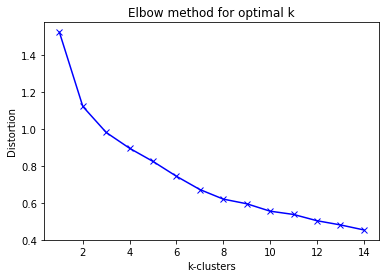

In [57]:
# Importing data visualization tools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as cls
import seaborn as sns
# Plot the elbow graph to decide the optimal cluster number
plt.plot(ks, distortions, 'bx-')
plt.xlabel('k-clusters')
plt.ylabel('Distortion')
plt.title('Elbow method for optimal k')
plt.show()

In [58]:
#We can't see a clear elbow change, so we define the optimal k=9
kclusters = 7
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

In [59]:
#Inserting the Cluster Labels in the dataset
sp_health.insert(2, 'Cluster Labels', kmeans.labels_)
#Sorting the dataset by HDDII
sp_health.sort_values('HDDII', ascending=False)

,Latitude,Longitude,Cluster Labels,HDDII,Wellbeing,Gyms
Neighborhood,,,,,,
Perdizes,-23.537929,-46.680671,4,0.897356,1,6
Jardim Paulista,-23.567435,-46.663692,4,0.86044,2,3
Moema,-23.597085,-46.662888,4,0.813121,2,3
Alto de Pinheiros,-23.549461,-46.712293,5,0.788391,1,1
Consolação,-23.557818,-46.660537,5,0.762387,0,4
Vila Mariana,-23.583700,-46.632741,2,0.759293,2,7
Santo Amaro,-23.656230,-46.719116,5,0.748333,0,3
Bela Vista,-23.562210,-46.647766,4,0.730488,1,5
Pinheiros,-23.566426,-46.703055,5,0.72619,1,2


In [60]:
# How much neighborhoods we have on each cluster?
sp_health['Cluster Labels'].value_counts()

1    27
3    26
6    11
5     8
0     8
4     7
2     7
Name: Cluster Labels, dtype: int64

In [61]:
#Change HDDII column character type to float
sp_health['HDDII'] = sp_health['HDDII'].astype('float')

<h2>Analyzing the clusters created

In [62]:
#Summary of each cluster based on the average number of venues we have for each category
cluster_summary = sp_health.groupby('Cluster Labels').mean().iloc[:, 2:]
cluster_summary

,HDDII,Wellbeing,Gyms
Cluster Labels,,,
0,0.441790,0.375000,7.000000
1,0.349307,0.000000,1.074074
2,0.652714,2.571429,6.571429
3,0.376788,0.000000,3.653846
4,0.770753,1.285714,4.857143
5,0.681812,0.250000,2.500000
6,0.463121,1.000000,2.636364


In [63]:
#Sorted by HDDII
cluster_summary.sort_values('HDDII', ascending=False)

,HDDII,Wellbeing,Gyms
Cluster Labels,,,
4,0.770753,1.285714,4.857143
5,0.681812,0.250000,2.500000
2,0.652714,2.571429,6.571429
6,0.463121,1.000000,2.636364
0,0.441790,0.375000,7.000000
3,0.376788,0.000000,3.653846
1,0.349307,0.000000,1.074074


<h3>Bar chart of average number of venues by Cluster

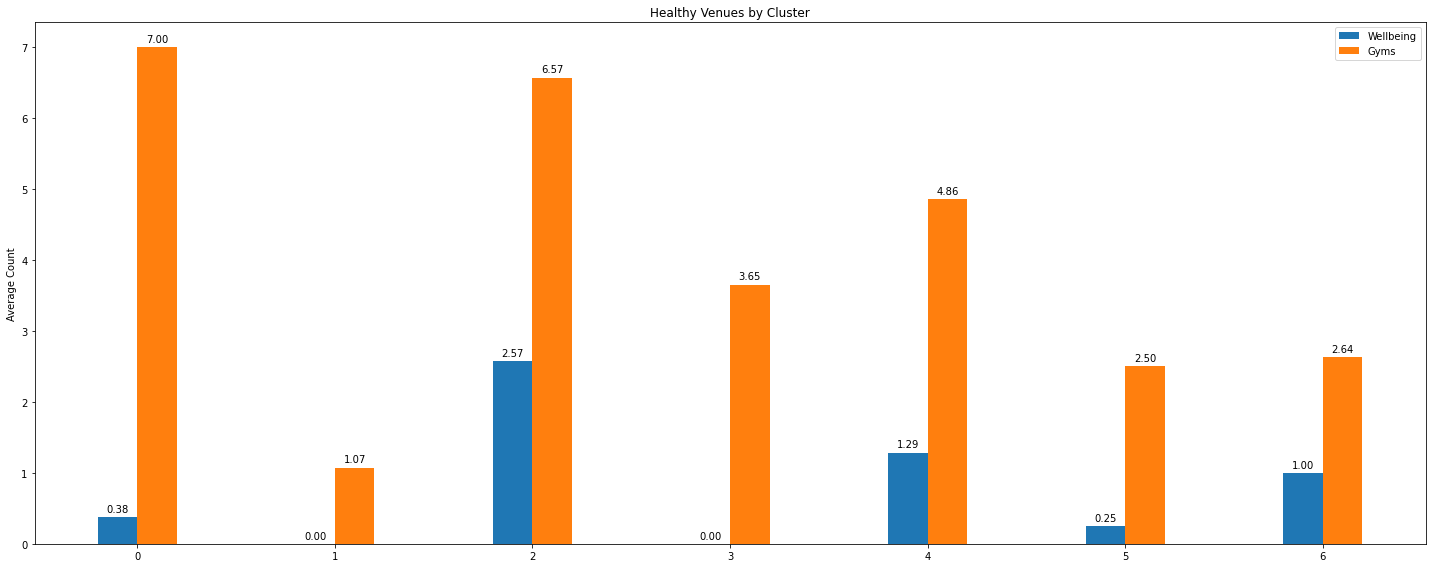

In [64]:
#Let's get visual! We'll use matplotlib's artist layer to plot a bar chart for the clusters categories
ind = np.arange(cluster_summary.shape[0])  # the x locations for the groups
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rec1 = ax.bar(ind + -1*width/2, cluster_summary['Wellbeing'], width=width, label='Wellbeing')
rec2 = ax.bar(ind + 1*width/2, cluster_summary['Gyms'], width=width, label='Gyms')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Count')
ax.set_title('Healthy Venues by Cluster')
ax.set_xticks(ind)
ax.set_xticklabels(cluster_summary.index)
ax.legend()

def labels(rects, xpos='center'):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # use 3 points offset
                    textcoords="offset points",
                    ha=xpos, va='bottom')  # in both directions
    
for rec in [rec1, rec2]:
    labels(rec)
    
fig.tight_layout()

<h4>We can see that clusters 0 has the highest concentration of venues and the 8 has the minimum.

<h3>Box plot HDDII distribution by Cluster Labels

<AxesSubplot:xlabel='Cluster Labels', ylabel='HDDII'>

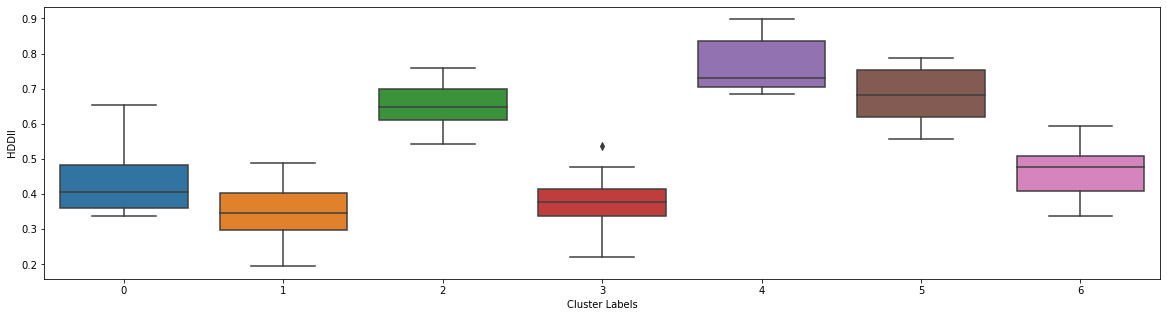

In [65]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x='Cluster Labels', y='HDDII', data=sp_health[['Cluster Labels', 'HDDII']], ax=ax)

<h4>We can see that Cluster 4 has the highest median HDDII

<h3>Analyzing the correlation between HHDDII and Healthy Venues quantity

In [66]:
# Summing the Healthy venues to check correlation with HDDII
sp_health['Healthy Venues'] = sp_health['Wellbeing'] + sp_health['Gyms']

sp_health.head()

,Latitude,Longitude,Cluster Labels,HDDII,Wellbeing,Gyms,Healthy Venues
Neighborhood,,,,,,,
Alto de Pinheiros,-23.549461,-46.712293,5,0.788391,1,1,2
Anhanguera,-23.432908,-46.788534,1,0.232859,0,1,1
Aricanduva,-23.578024,-46.511454,3,0.371937,0,4,4
Artur Alvim,-23.539221,-46.485265,3,0.400723,0,3,3
Barra Funda,-23.525462,-46.667513,5,0.557293,0,3,3


In [76]:
#Correlation between HDDII and Healthy Venues
sp_health[['Cluster Labels','HDDII','Healthy Venues']].corr()

,Cluster Labels,HDDII,Healthy Venues
Cluster Labels,1.000000,0.399302,0.036562
HDDII,0.399302,1.000000,0.476571
Healthy Venues,0.036562,0.476571,1.000000


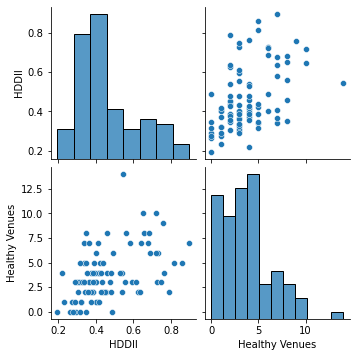

In [78]:
 # Let's check how a scatterplot looks like 
sns.pairplot(sp_health[['HDDII','Healthy Venues']])

<h4>We can see that the highest HDDII will have more Healthy Venues

<h3>As cluster 4 has the highest median of HDDII, we will look for the best neighborhood for the pilates studio within that cluster.

In [69]:
# First we define a DataFrame with this cluster
potential = sp_health[(sp_health['Cluster Labels'] == 4)]
potential.head()

,Latitude,Longitude,Cluster Labels,HDDII,Wellbeing,Gyms,Healthy Venues
Neighborhood,,,,,,,
Bela Vista,-23.562210,-46.647766,4,0.730488,1,5,6
Itaim Bibi,-23.584381,-46.678444,4,0.722139,1,5,6
Jardim Paulista,-23.567435,-46.663692,4,0.860440,2,3,5
Moema,-23.597085,-46.662888,4,0.813121,2,3,5
Morumbi,-23.596499,-46.717845,4,0.683930,1,7,8


<h4>Let's see the potential neighborhoods on the map.

In [70]:
potential_map = folium.Map(location=[sp_coord[0], sp_coord[1]],zoom_start=12)

maplist = zip(potential['Latitude'],
              potential['Longitude'],
              potential['Healthy Venues'],
              potential['HDDII'],
              potential['Cluster Labels'])
col = {4 : 'blue'}

# add markers to map
for lat, lng, mk, hdi, clust in maplist:
    label = '{}\n HDDII:{}\n HealthyVenues:{}'.format(clust, hdi, mk)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color=col[clust],
        fill=True,
        fill_color=col[clust],
        fill_opacity=0.7,
        parse_html=False).add_to(potential_map)
    
    
potential_map

<h3>Let's create a list of Potential Venues, based on HDDII > 0.75  and less Helthy Venues, to choose the best location!

In [71]:
# Let's apply a threshold for HDDII, we don't want any neighborhood with HDDII lower than 0.75
higher_potential = potential[potential['HDDII'] >= 0.75]
higher_potential.head()

,Latitude,Longitude,Cluster Labels,HDDII,Wellbeing,Gyms,Healthy Venues
Neighborhood,,,,,,,
Jardim Paulista,-23.567435,-46.663692,4,0.860440,2,3,5
Moema,-23.597085,-46.662888,4,0.813121,2,3,5
Perdizes,-23.537929,-46.680671,4,0.897356,1,6,7


<h3>Finally we have our top 3 Neighborhoods for our new Pilates Studio venue!

<h2>The Neighborhood with less Healthy Venues and higher HDDII is Jardim Paulista. 

Let's try to find where would be the optimal spot for the venue, so it would be near those Healthy Venues.

In [73]:
# First let's see get the gyms and wellbeing spaces
jardim_spots = sp_venues[(sp_venues['Neighborhood'] == 'Jardim Paulista') & ((sp_venues['Venue Category'].isin(wellbeing)) | (sp_venues['Venue Category'].isin(gym)))]
jardim_spots.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
103,Jardim Paulista,-23.567435,-46.663692,Les Cinq Gym,-23.567124,-46.662261,Gym / Fitness Center
131,Jardim Paulista,-23.567435,-46.663692,Top Form Academia,-23.567911,-46.661955,Gym / Fitness Center
141,Jardim Paulista,-23.567435,-46.663692,My Yoga,-23.565829,-46.658869,Yoga Studio
168,Jardim Paulista,-23.567435,-46.663692,Academia CAP,-23.567254,-46.669574,Gym
189,Jardim Paulista,-23.567435,-46.663692,Spa L'Occitane,-23.562532,-46.668205,Spa


Now let's use the K-Means algorithm to find a centroid between those 5 spots.

In [74]:
# Extract the spots coordinates
spots_coords = jardim_spots[['Venue Latitude', 'Venue Longitude']].values.astype('float')
# Create th k-means object
spots_k = KMeans(n_clusters=1).fit(spots_coords)
# Get the centroid coordinates
spots_center = spots_k.cluster_centers_
spots_center

array([[-23.56613015, -46.66417303]])

<h3>Let's view at map!

In [75]:
jardim_map = folium.Map(location=[spots_center[0,0], spots_center[0,1]],zoom_start=16)

maplist = zip(jardim_spots['Venue Latitude'],
              jardim_spots['Venue Longitude'],
              jardim_spots['Venue'],
              jardim_spots['Venue Category'])

# add gym markers to map
for lat, lng, ven, cat in maplist:
    label = '{}\n {}'.format(ven, cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color=col[clust],
        fill_opacity=0.7,
        parse_html=False).add_to(jardim_map)  
 
# add centroid markers
folium.CircleMarker(
    [spots_center[0,0], spots_center[0,1]],
    radius=10,
    popup='Spots Center Point',
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.7,
    parse_html=False).add_to(jardim_map)

    
jardim_map

<h2>That's it! Here's the possible spot for the new Pilates Studio in São Paulo!